# PCA的降噪功能

In [1]:
import matplotlib.pyplot as plt
import numpy as np

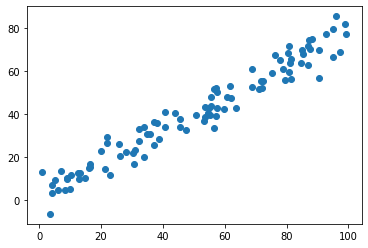

In [2]:
X = np.empty(shape = (100, 2)) 
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 5., size = 100)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
x_reduction = pca.transform(X)
x_restore = pca.inverse_transform(x_reduction)

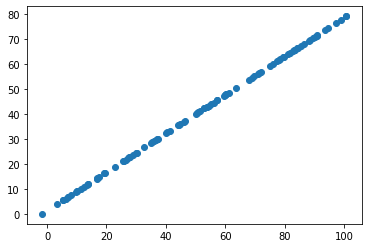

In [4]:
plt.scatter(x_restore[:, 0], x_restore[:, 1])
plt.show()

## 使用digits数据集证明PCA的降噪功能

In [5]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
Y = digits.target

In [6]:
# 对数据添加噪声
noisy_digits = X + np.random.normal(0., 5., size = X.shape)

In [7]:
# 获取示例样本进行显示
example_digits = noisy_digits[Y==0, :][:10]
for num in range(1, 10):
    X_num = noisy_digits[Y==num, :][:10]
    example_digits = np.vstack([example_digits, X_num])

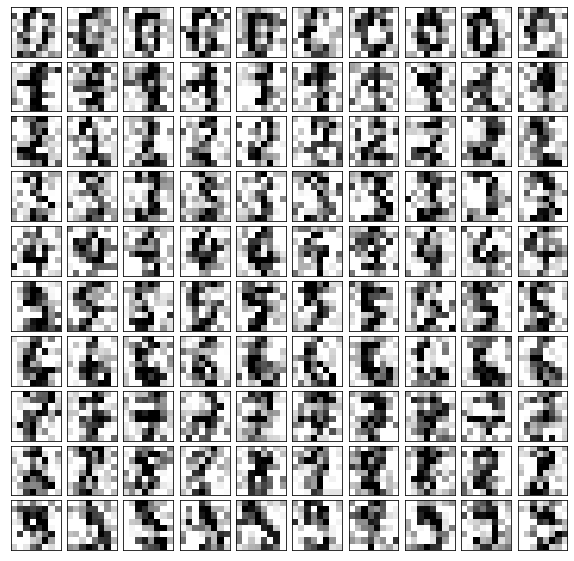

In [8]:
# 显示函数
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), subplot_kw={"xticks":[], "yticks":[]}, gridspec_kw=dict(hspace = 0.1, wspace = 0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap = "binary", interpolation = "nearest", clim = (0,16))
    plt.show()

plot_digits(example_digits)

In [9]:
pca = PCA(0.4)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

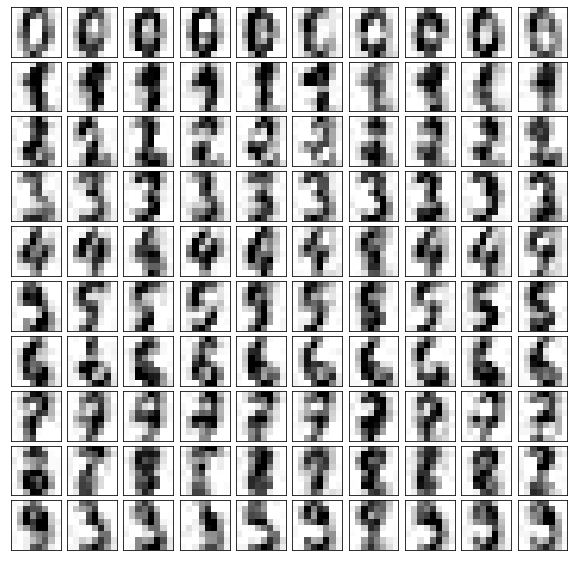

In [10]:
example_reduction = pca.transform(example_digits)
example_filter =  pca.inverse_transform(example_reduction) # PCA降噪后的数据

# 降噪后的数据显示
plot_digits(example_filter)

## 总结：
* PCA确实具有降噪功能